In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


In [2]:
# Connect to your SQLite database
conn = sqlite3.connect("detections.db")

# Load the table into a pandas DataFrame
df = pd.read_sql_query("SELECT * FROM detections", conn)

# Show the first 5 rows
df.head()


,timestamp,frame_id,object,confidence,x,y,width,height
0,2025-05-10 02:20:39.765983,0,person,0.859371,357.482666,242.183487,559.500977,473.367279
1,2025-05-10 02:20:39.765983,0,cat,0.623384,322.951874,239.913773,505.146790,477.469086
2,2025-05-10 02:20:39.765983,0,mouse,0.267566,618.726624,123.798737,42.039917,44.467560
3,2025-05-10 02:20:40.018422,1,cat,0.723425,372.513916,240.283508,534.972168,478.265137
4,2025-05-10 02:20:40.018422,1,cat,0.694766,284.362152,240.241440,502.141998,476.400299


In [3]:
# Basic structure of the data
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   121 non-null    object 
 1   frame_id    121 non-null    int64  
 2   object      121 non-null    object 
 3   confidence  121 non-null    float64
 4   x           121 non-null    float64
 5   y           121 non-null    float64
 6   width       121 non-null    float64
 7   height      121 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 7.7+ KB


,frame_id,confidence,x,y,width,height
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,28.438017,0.646871,573.952757,316.751217,378.819724,390.712891
std,20.564894,0.285499,246.030933,132.357546,185.070510,181.136610
min,0.000000,0.104201,146.736282,80.797028,42.038696,44.467560
25%,8.000000,0.407825,359.596649,241.911209,270.517120,300.519958
50%,32.000000,0.749288,618.478149,280.005310,416.954559,446.250671
75%,48.000000,0.904011,667.604004,361.633911,545.040344,475.240601
max,64.000000,0.935052,1232.170776,683.214966,696.099487,712.289124


In [4]:
# Check for null values
df.isnull().sum()


timestamp     0
frame_id      0
object        0
confidence    0
x             0
y             0
width         0
height        0
dtype: int64

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [6]:
df['object'].value_counts()


object
person           34
laptop           13
tv               10
cat              10
remote            9
bottle            8
scissors          7
chair             6
toothbrush        4
sink              4
dining table      3
handbag           2
tennis racket     2
keyboard          2
frisbee           2
mouse             2
vase              1
potted plant      1
book              1
Name: count, dtype: int64

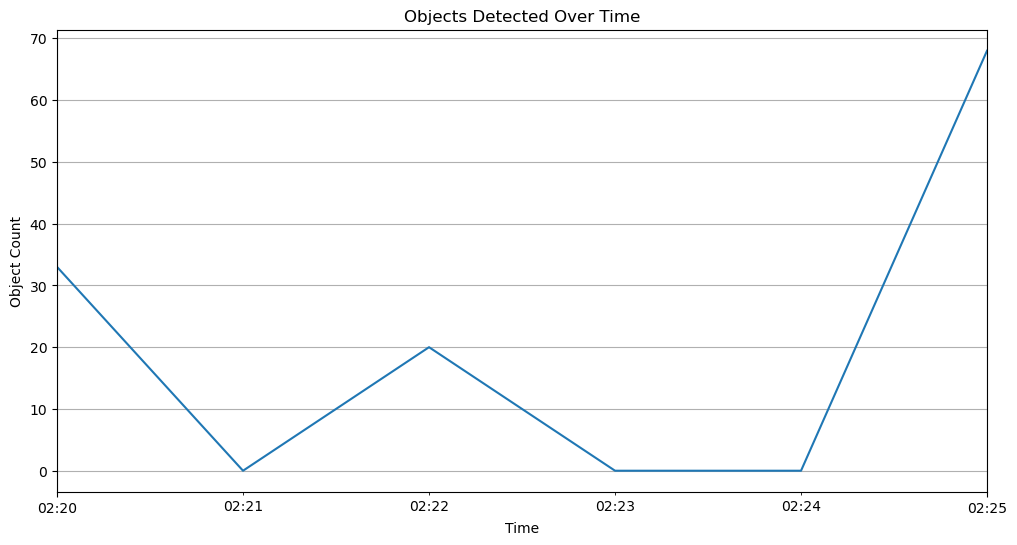

In [7]:
# Group by timestamp (minute-level) and count objects
df.set_index('timestamp', inplace=True)
df.resample('1Min')['object'].count().plot(figsize=(12, 6))
plt.title("Objects Detected Over Time")
plt.ylabel("Object Count")
plt.xlabel("Time")
plt.grid(True)
plt.show()


C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


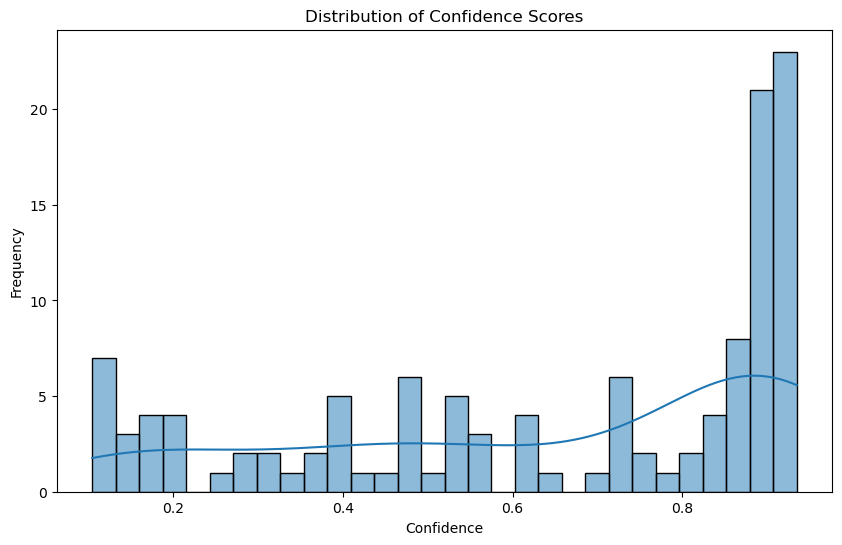

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['confidence'], bins=30, kde=True)
plt.title("Distribution of Confidence Scores")
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.show()


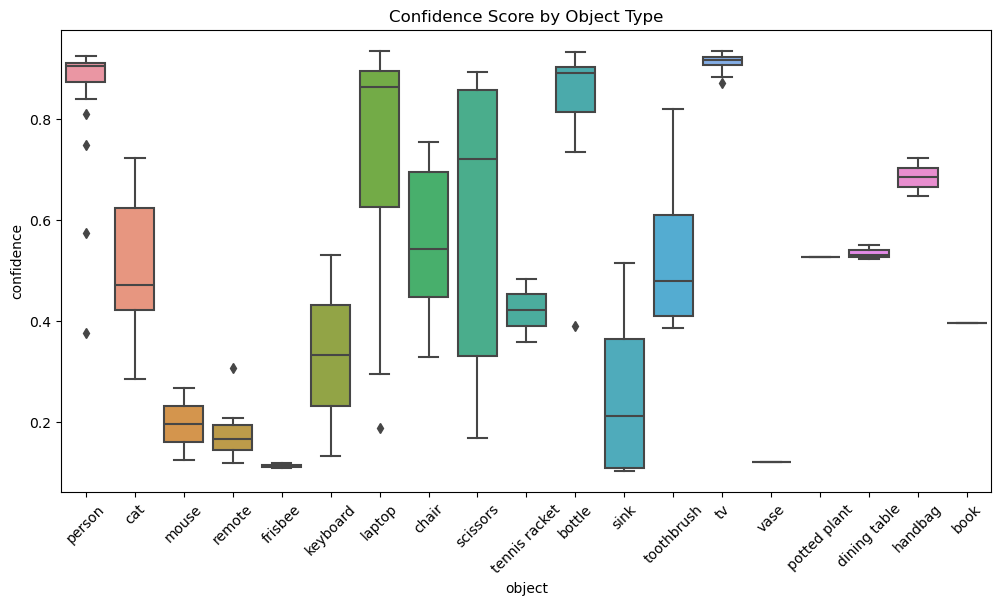

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='object', y='confidence', data=df)
plt.title("Confidence Score by Object Type")
plt.xticks(rotation=45)
plt.show()


In [10]:
df.reset_index(inplace=True)  # If you set index to timestamp earlier
df.to_csv("cleaned_detections.csv", index=False)


C:\Users\siddh\AppData\Local\Temp\ipykernel_7192\2465737630.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x="x", y="y", cmap="Reds", shade=True, bw_adjust=0.5)
C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


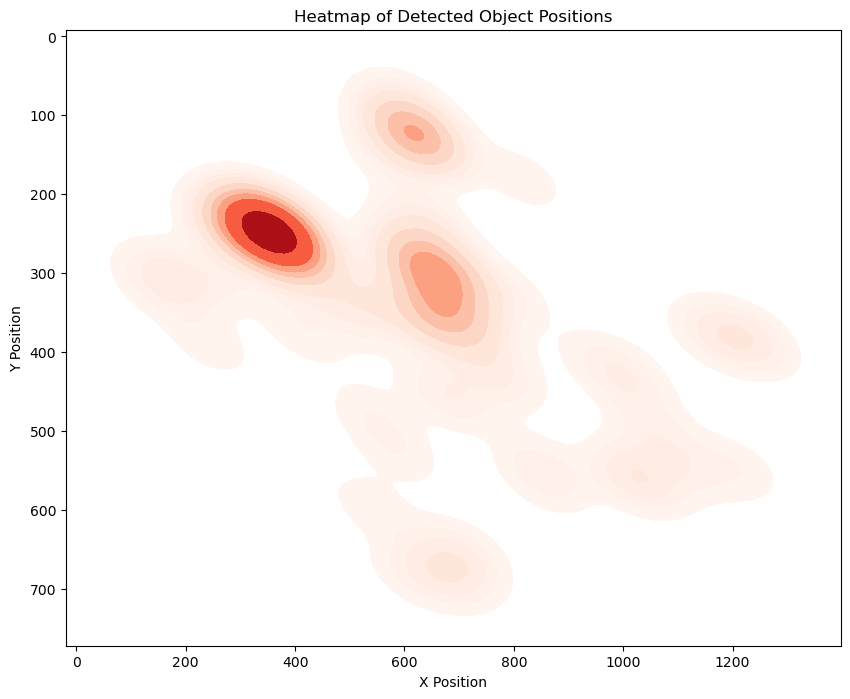

In [11]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x="x", y="y", cmap="Reds", shade=True, bw_adjust=0.5)
plt.title("Heatmap of Detected Object Positions")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.gca().invert_yaxis()  # Optional: Flip Y-axis to match image coordinates
plt.show()


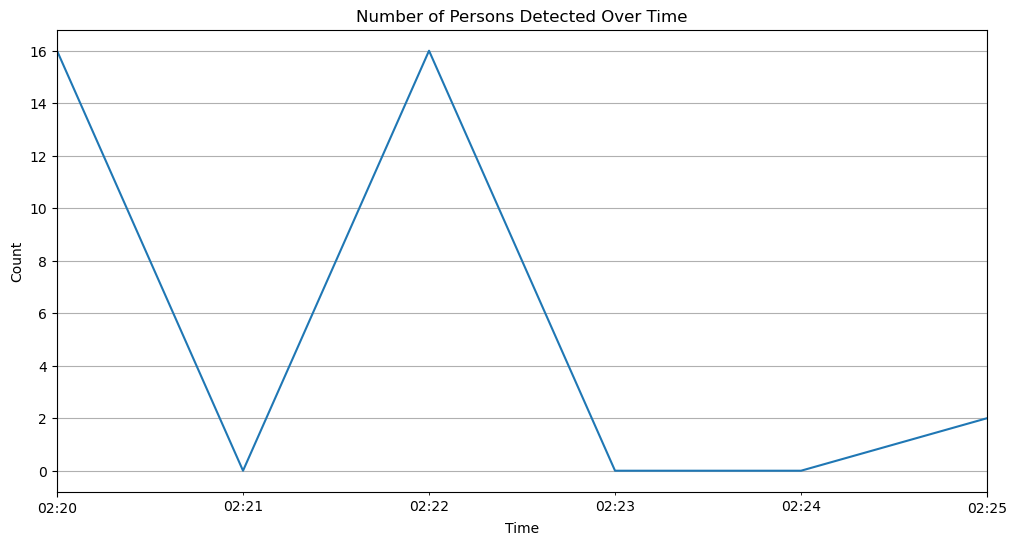

In [12]:
# Filter by object (e.g., person)
person_df = df[df['object'] == 'person']

# Resample and plot count over time
person_df.set_index('timestamp', inplace=True)
person_df.resample('1Min')['object'].count().plot(figsize=(12, 6))
plt.title("Number of Persons Detected Over Time")
plt.ylabel("Count")
plt.xlabel("Time")
plt.grid(True)
plt.show()


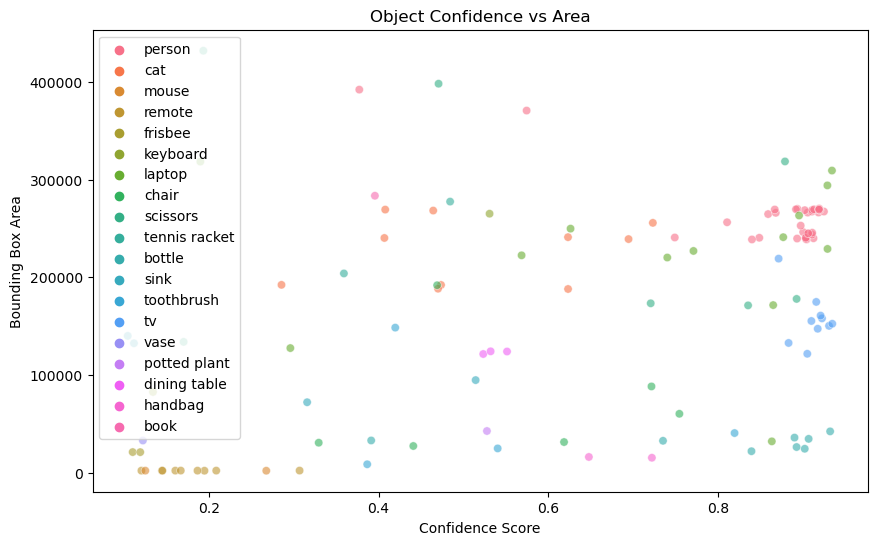

In [13]:
df['area'] = df['width'] * df['height']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='confidence', y='area', hue='object', alpha=0.6)
plt.title("Object Confidence vs Area")
plt.xlabel("Confidence Score")
plt.ylabel("Bounding Box Area")
plt.legend()
plt.show()


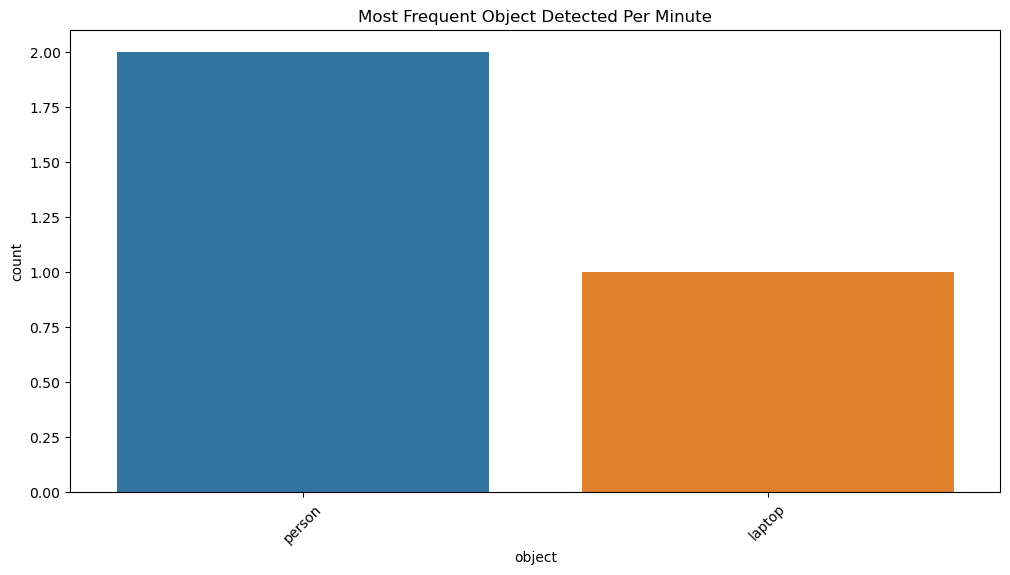

In [14]:
df['minute'] = df['timestamp'].dt.floor('min')

most_common = df.groupby(['minute', 'object']).size().reset_index(name='count')
most_common = most_common.sort_values(['minute', 'count'], ascending=[True, False])

top_per_minute = most_common.groupby('minute').first().reset_index()

plt.figure(figsize=(12, 6))
sns.countplot(data=top_per_minute, x='object', order=top_per_minute['object'].value_counts().index)
plt.title("Most Frequent Object Detected Per Minute")
plt.xticks(rotation=45)
plt.show()
